<a href="https://colab.research.google.com/github/adewoleopeyemi/Generative-Adversarial-Network/blob/colab-build-version1/GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import cifar100
(train_x, train_y), (testx, testy)= cifar100.load_data()

In [2]:
import numpy as np

data = np.asarray(train_x, dtype = 'float32')
data = data/255.

(50000, 32, 32, 3)


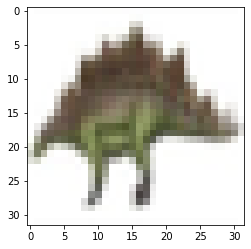

In [3]:
import matplotlib.pyplot as plt
plt.imshow(data[1])
print(data.shape)

In [4]:
import tensorflow as tf
keras = tf.keras

layers = keras.layers
Model = keras.models.Model
Input = keras.Input

In [5]:
discriminator_input = Input(shape = (32, 32, 3), name = 'discriminator_input')

In [6]:
x = discriminator_input 

In [7]:
filters = (64, 128, 128)
kernel_size = (3, 3, 3)
conv_strides =  (2, 2, 2)
momentum = 0.02
dropout = True
dropout_rate = 0.5
for i in range(3):
    x = layers.Conv2D(
    filters =  filters[i]
    ,kernel_size = kernel_size[i]
    ,strides = conv_strides[i]
    ,padding = 'same', 
    name = 'discriminator_conv_' + str(i))(x)
    x = layers.BatchNormalization(momentum=0.01)(x)
        
    x = layers.Activation('relu')(x)
    x = layers.Dropout(rate=0.5)(x)
            
x = layers.Flatten()(x)
discriminator_output = layers.Dense(1, activation = 'sigmoid')(x)
    
discriminator = Model(discriminator_input, discriminator_output)

In [8]:
discriminator.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
discriminator_input (InputLa [(None, 32, 32, 3)]       0         
_________________________________________________________________
discriminator_conv_0 (Conv2D (None, 16, 16, 64)        1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 16, 16, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 16, 16, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 64)        0         
_________________________________________________________________
discriminator_conv_1 (Conv2D (None, 8, 8, 128)         73856     
_________________________________________________________________
batch_normalization_1 (Batch (None, 8, 8, 128)        

In [9]:
filters = (64, 128, 128,3)
generator_input = Input(shape = (200,), name = "generator_input")
x = generator_input
x = layers.Dense(512)(x)

x = layers.Activation('relu')(x)

x = layers.Reshape((2, 2, 128))(x)
for i in range(4):
    x = layers.UpSampling2D()(x)
    x = layers.Conv2D(
    filters =  filters[i]
    ,kernel_size = 3
    ,strides = 1
    ,padding = 'same')(x)
    if i < 3:
        x = layers.Activation('relu')(x)
    else:
        x = layers.Activation('tanh')(x)
        
generator_output = x
generator = Model(generator_input, generator_output)

In [10]:
generator.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
generator_input (InputLayer) [(None, 200)]             0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               102912    
_________________________________________________________________
activation_3 (Activation)    (None, 512)               0         
_________________________________________________________________
reshape (Reshape)            (None, 2, 2, 128)         0         
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 4, 4, 64)          73792     
_________________________________________________________________
activation_4 (Activation)    (None, 4, 4, 64)         

In [11]:

discriminator.compile(optimizer = tf.keras.optimizers.RMSprop(lr = 0.008), 
                     loss = tf.keras.losses.binary_crossentropy,
                     metrics = ['acc'])

discriminator.trainable = False

model_input = Input(shape = (200,), name = 'model_input')
model_output = discriminator(generator(model_input))
model = Model(model_input, model_output)

model.compile(
    optimizer = tf.keras.optimizers.RMSprop(lr = 0.0001), 
    loss = tf.keras.losses.binary_crossentropy,
    metrics = ['acc']
)

In [12]:
def train_discriminator(x_train, batch_size):
    valid = np.ones((batch_size, 1))
    fake = np.zeros((batch_size, 1))
    
    # Train on real images
    idx = np.random.randint(0, x_train.shape[0], batch_size)
    true_imgs = x_train[idx]
    discriminator.train_on_batch(true_imgs, valid)
    
    # Train on fake images
    noise = np.random.randint(0, 1, (batch_size, 200))
    gen_imgs = generator.predict(noise)
    discriminator.train_on_batch(gen_imgs, fake)
    
def train_generator(batch_size):
    valid = np.ones((batch_size, 1))
    noise = np.random.normal(0, 1, (batch_size, 200))
    model.train_on_batch(noise, valid)
    
    

In [13]:
epochs = 10000
batch_size = 64

for epoch in range(epochs):
    train_discriminator(data, batch_size)
    train_generator(batch_size)
    if epoch%1000 == 0:
      print('Epoch ', epoch, ' done')

Epoch  0  done
Epoch  1000  done
Epoch  2000  done
Epoch  3000  done
Epoch  4000  done
Epoch  5000  done
Epoch  6000  done
Epoch  7000  done
Epoch  8000  done
Epoch  9000  done


In [17]:
noise = np.random.normal(0, 1, (1,200))

In [18]:
len(noise)

1

In [19]:
img = generator.predict(noise)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


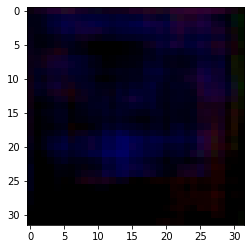

In [20]:
import matplotlib.pyplot as plt
img = np.reshape(img, (32, 32, 3))
plt.imshow(img)